# Deep Learning Term Project for ECG (DIL700)

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib widget
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
import warnings
import os
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
from general_functions import *


from sklearn.preprocessing import OneHotEncoder
warnings.filterwarnings('ignore')

## Loading Dataset

Collect all the data from the csv files

In [2]:
# # Original data

train_df=combine_csv_files_to_df('./Dataset_mitbih/Training/')
test_df=combine_csv_files_to_df('./Dataset_mitbih/Testing/')

# Synthetic data

# train_df = pd.read_csv('./Dataset_mitbih/Synthetic/mitbih_with_syntetic_train.csv')
# train_df = train_df.iloc[:, :-1]
# train_df.rename(columns={'class': 187}, inplace=True)
# test_df = pd.read_csv('./Dataset_mitbih/Synthetic/mitbih_with_syntetic_test.csv')
# test_df = test_df.iloc[:, :-1]
# test_df.rename(columns={'class': 187}, inplace=True)

full_df=pd.concat([train_df,test_df],ignore_index=True)

In [3]:
df_generated = pd.read_csv('./Dataset_mitbih/Synthetic/generated_samples.csv', header=None)
df_generated = df_generated[df_generated[187] != 187]

In [4]:
full_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109441,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
109442,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
109443,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
109444,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [5]:
df_generated

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
1,0.915009,0.835311,0.178229,-0.010374,0.083616,0.131879,0.112279,0.151765,0.200770,0.191635,...,0.011104,0.006141,0.000081,0.003620,-0.003944,-0.007017,0.004015,0.012689,0.015563,1
2,0.984370,0.900088,0.230375,0.021089,0.052217,0.126854,0.093552,0.135447,0.200918,0.165995,...,-0.000308,0.012638,0.007678,-0.009802,0.006253,-0.001771,-0.005892,0.001900,-0.001575,1
3,0.972488,0.876487,0.237004,0.014626,0.045844,0.091558,0.104766,0.123837,0.154608,0.160589,...,0.005679,0.007317,0.008362,-0.007414,-0.000442,-0.002197,-0.003717,0.002979,0.002643,1
4,0.922158,0.798313,0.142464,0.003448,0.072673,0.121930,0.105940,0.149545,0.182272,0.166507,...,0.013367,0.007472,0.004198,-0.015825,0.002066,-0.004081,-0.006395,0.011079,0.014992,1
5,1.043076,0.978682,0.309280,0.069887,0.239820,0.263684,0.243263,0.260813,0.291859,0.296907,...,-0.013334,-0.001745,0.001852,0.009766,0.000605,-0.009912,0.002686,0.003891,-0.012270,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7996,0.969356,1.101294,0.370745,0.091415,0.138155,0.240818,0.231619,0.226629,0.318113,0.300770,...,-0.006124,0.007470,0.003579,-0.004650,-0.003296,0.005676,-0.014070,0.005561,-0.001636,1
7997,0.972352,0.847217,0.212078,0.015675,0.113756,0.148514,0.138418,0.223164,0.230143,0.208189,...,0.003932,0.005463,0.004767,-0.002208,0.002980,-0.003553,-0.001607,-0.001156,0.001880,1
7998,0.992469,0.966112,0.241151,0.036005,0.128173,0.175430,0.153649,0.141733,0.254529,0.213155,...,-0.003158,0.006838,0.001957,-0.012689,0.001496,-0.001571,-0.019347,0.003470,-0.001129,1
7999,0.976325,0.983133,0.495235,0.279048,0.315849,0.378001,0.415146,0.439624,0.391488,0.404690,...,0.019140,0.004504,0.009234,0.026155,-0.016957,0.002976,-0.015325,0.010003,-0.006836,1


In [6]:
print(full_df[187].unique())

[0. 1. 2. 3. 4.]


In [7]:
labels = ['Normal', 'Artial Premature', 'Premature ventricular contraction', 'Fusion of ventricular and normal', 'Paced']

In [8]:
print('Number of samples in data:')
print(labels[0],':', len(full_df[full_df[187]==0]))
print(labels[1],':', len(full_df[full_df[187]==1]))
print(labels[2],':', len(full_df[full_df[187]==2]))
print(labels[3],':', len(full_df[full_df[187]==3]))
print(labels[4],':', len(full_df[full_df[187]==4]))

Number of samples in data:
Normal : 90589
Artial Premature : 2779
Premature ventricular contraction : 7236
Fusion of ventricular and normal : 803
Paced : 8039


## Visualization

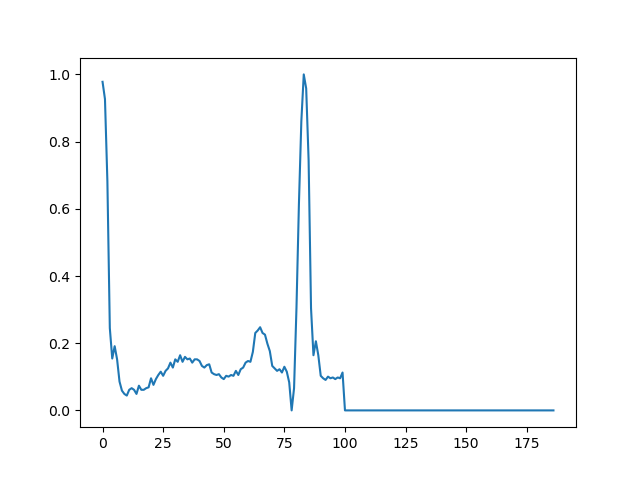

In [9]:
plt.figure()
ecg_example = full_df.iloc[0,:187]
plt.plot(ecg_example);

## Compare real vs generated data

In [10]:
samples = list()
samples.append(plot_ecg_examples(full_df, 1, 20))
samples.append(plot_ecg_examples(df_generated, 1, 20))

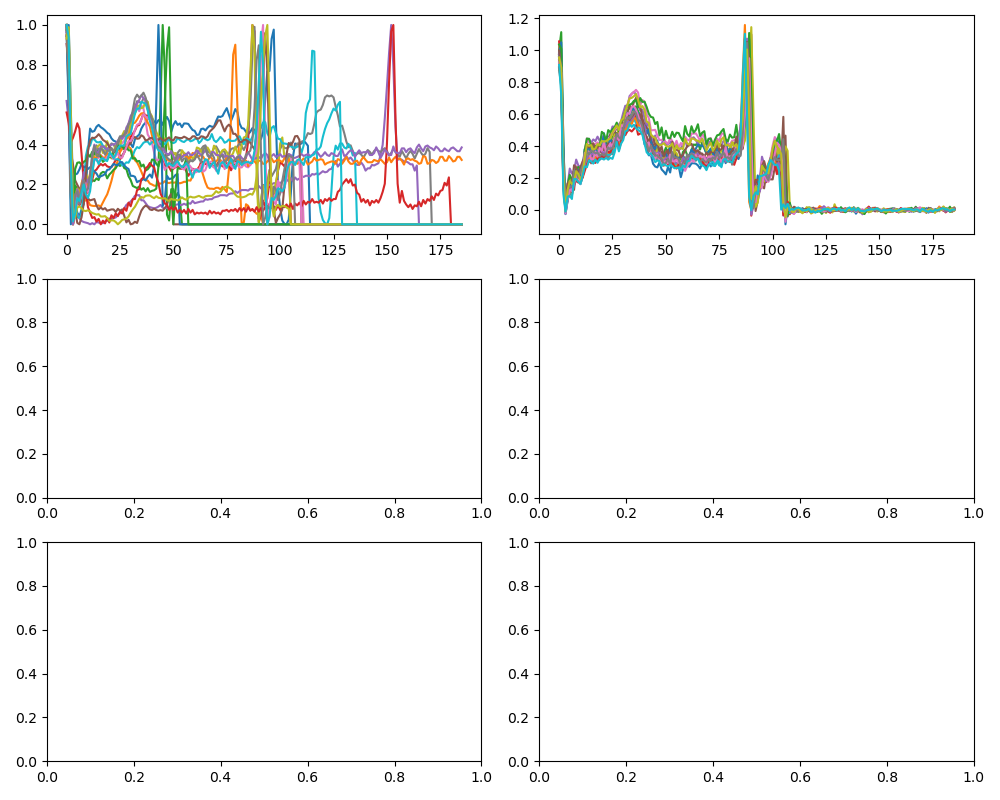

In [11]:
fig, axs = plt.subplots(3, 2, figsize=(10, 8))
for i in range(2):
    ax = axs.flat[i]
    ax.plot(samples[i].values[:,:-2].transpose())

fig.tight_layout()
plt.show()

# Heatmaps of classes

## Heatmap of class 1 (Atrial premature)

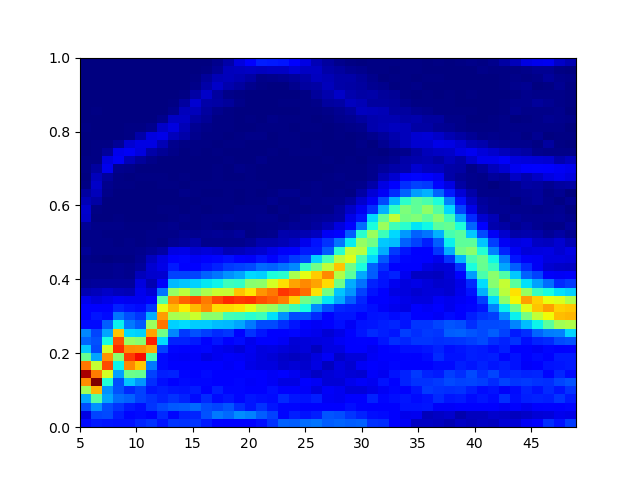

In [12]:
fig = plt.figure()
hist_class1 = plot_hist(full_df,1,50,5,45)

## Heatmap of class 1 (Artial Premature Generated)

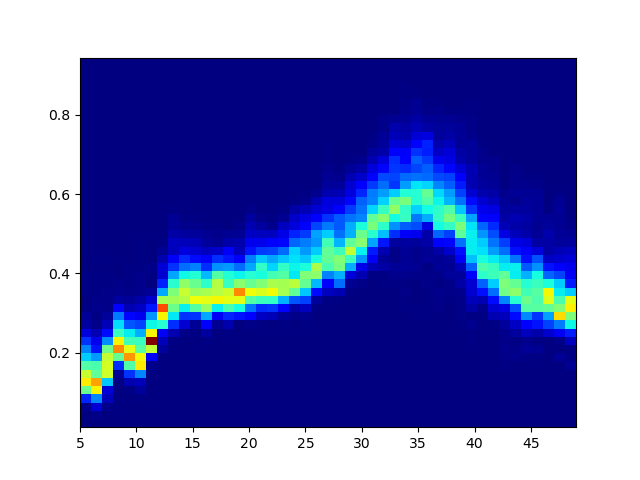

In [13]:
fig = plt.figure()
hist_class2 = plot_hist(df_generated,1,50,5,45)

# Duration of signal per class

In [14]:
durations = list()
durations.append(mean_dur(full_df, 1))
durations.append(mean_dur(df_generated, 1))


print('Mean duration of class Artial Premature', ':', durations[0])
print('Mean duration of class Artial Premature Generated', ':', durations[1])

Mean duration of class Artial Premature : 114.17
Mean duration of class Artial Premature Generated : 187.0


## Visualization of clusters

## kPCA

In [35]:
pca_data_1 = get_random_data_from_class(full_df, 1, n_examples=2000)
pca_data_2 = get_random_data_from_class(df_generated, 1, n_examples=2000)
# Change the values of the last column to 2
pca_data_2[187] = 0

# put the different dataframes into one dataframe
pca_data = pd.concat([pca_data_1, pca_data_2])

## LinearPCA

In [36]:
# Find the first 3 principal components for both the datasets
linear_pca = KernelPCA(kernel="linear", n_components=4, random_state=0)

np_linear_pca = linear_pca.fit_transform(pca_data[pca_data.columns[:-1]])

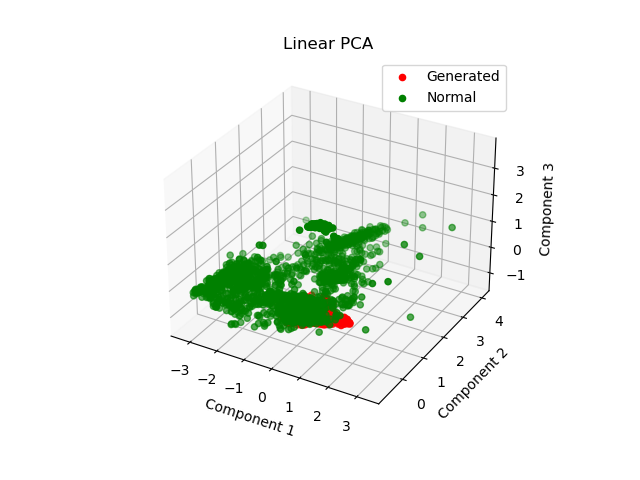

In [37]:
plot_3D_pca(np_linear_pca, pca_data, 2, ['Generated','Normal'], 'Linear PCA')

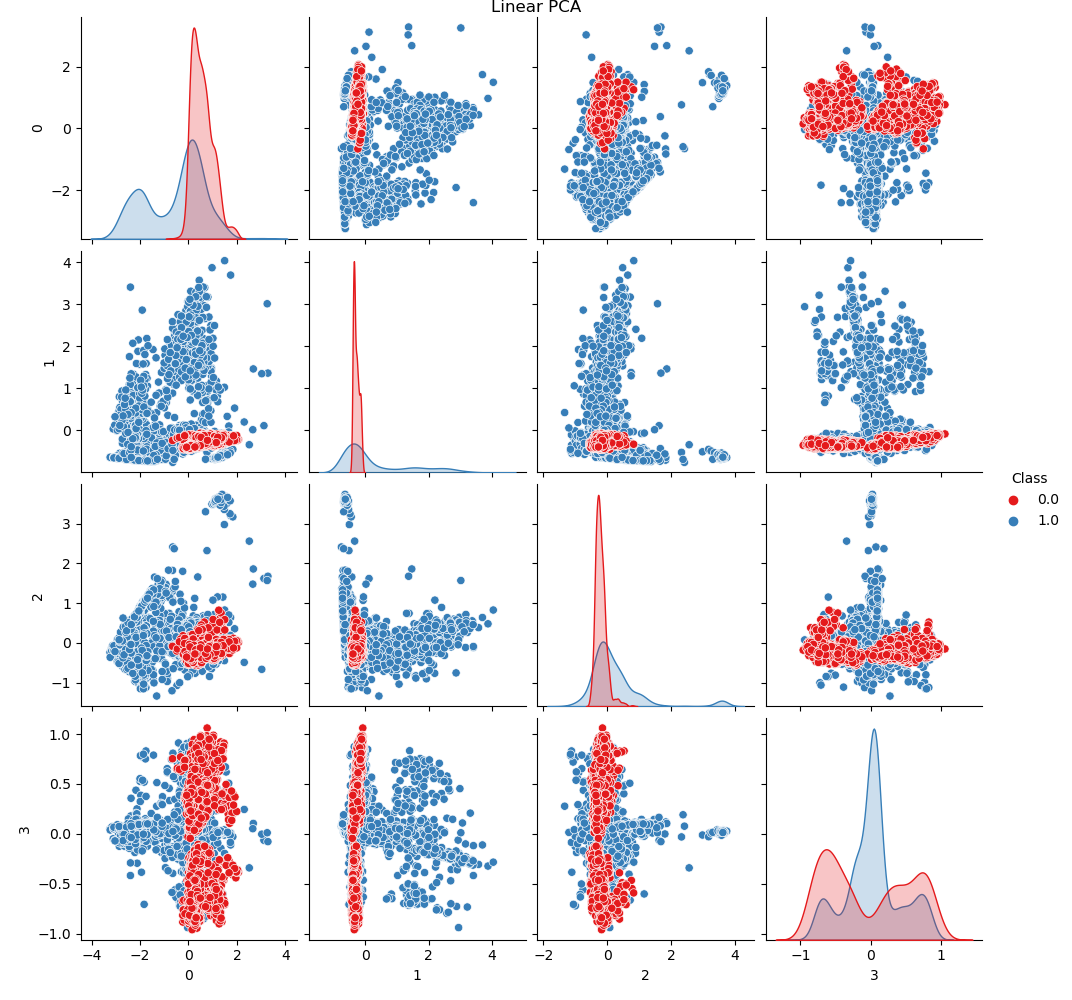

In [28]:
pairplot_pca(np_linear_pca, pca_data, 'Linear PCA')

Save the outliers in a datset to train GAN

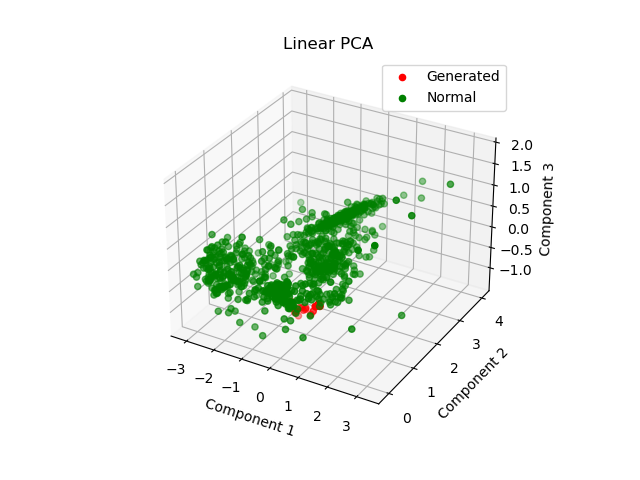

In [46]:
mask = np_linear_pca[:, 1] > 0.1
new_pca_data = pca_data[mask]
new_linear_pca = np_linear_pca[mask]

plot_3D_pca(new_linear_pca, new_pca_data, 2, ['Generated','Normal'], 'Linear PCA')

# Save as csv
new_pca_data.to_csv('Artial_Premature_Outliers.csv', index=False, header=False)

## Sigmoid PCA

In [ ]:
# Find the first 3 principal components for both the datasets
sigmoid_pca = KernelPCA(kernel="sigmoid", n_components=4, random_state=0)

np_sigmoid_pca = sigmoid_pca.fit_transform(pca_data[pca_data.columns[:-1]])

In [ ]:
plot_3D_pca(np_sigmoid_pca, pca_data, 5, labels, 'Sigmoid Kernel PCA')

In [ ]:
pairplot_pca(np_sigmoid_pca, pca_data, 'Sigmoid Kernel PCA')

## RBF PCA

In [ ]:
# Find the first 3 principal components for both the datasets
rbf_pca = KernelPCA(kernel="rbf", n_components=4, random_state=0)

np_rbf_pca = rbf_pca.fit_transform(pca_data[pca_data.columns[:-1]])

In [ ]:
plot_3D_pca(np_sigmoid_pca, pca_data, 5, labels, 'RBF Kernel PCA')

In [ ]:
pairplot_pca(np_sigmoid_pca, pca_data, 'RBF Kernel PCA')

## Poly PCA

In [ ]:
# Find the first 3 principal components for both the datasets
poly_pca = KernelPCA(kernel="poly", n_components=4, random_state=0, degree=3)

np_poly_pca = poly_pca.fit_transform(pca_data[pca_data.columns[:-1]])

In [ ]:
plot_3D_pca(np_poly_pca, pca_data, 5, labels, 'Poly Kernel PCA')

In [ ]:
pairplot_pca(np_poly_pca, pca_data, 'Poly Kernel PCA')

## TSNE

Testing part for a TSNE with 4 components and 500 instances from each class

In [ ]:
tsne = TSNE(n_components=4, verbose=1, random_state=123, method='exact')

np_tsne = tsne.fit_transform(pca_data.values[:,:-1])


In [ ]:
plot_3D_pca(np_tsne, pca_data, 5, labels, 't-SNE')

In [ ]:
pairplot_pca(np_tsne, pca_data, 't-SNE')